# **CASE STUDY**

### **INTERPRETABLE SELF ORGANIZING MAP (iSOM) ASSISTED INTERACTIVE MULTI-CRITERIA DECISION-MAKING FOLLOWING PARETO RACE**

---



### **Importing Pre-requisites**

In [ ]:
! pip install --pre -U pymoo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210077 sha256=3a9eabae460a8b40416618a3fc6084e134d18af35fcb620e2c2b854954d1e1f7
  Stored in directory: /root/.cache/pip/wheels/01/e1/49/37e6bde9886439057450c494a79b0bef8bbe897a54aebfc757
Successfully built grapheme


### **Importing Libraries**

In [ ]:
import numpy as np
import math as ma
import scipy
import random
from pymoo.indicators.hv import HV
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.algorithms.moo.rnsga2 import RNSGA2
from pymoo.algorithms.moo.rnsga3 import RNSGA3
from pymoo.algorithms.moo.moead import MOEAD
from pymoo.algorithms.moo.rvea import RVEA
from pymoo.algorithms.moo.ctaea import CTAEA
from pymoo.factory import get_sampling, get_crossover, get_mutation
from pymoo.core.problem import ElementwiseProblem
from pymoo.factory import get_problem, get_reference_directions
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
from scipy.stats import qmc
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.problems import get_problem
from pymoo.optimize import minimize
from sklearn import preprocessing
from matplotlib.patches import Polygon

from pymoo.constraints.from_bounds import ConstraintsFromBounds
from pymoo.gradient.automatic import AutomaticDifferentiation
from pymoo.problems import get_problem
from pymoo.indicators.kktpm import KKTPM
from pymoo.operators.sampling.rnd import FloatRandomSampling
from sklearn.metrics.pairwise import euclidean_distances

## **DTLZ-2 Pareto Front**

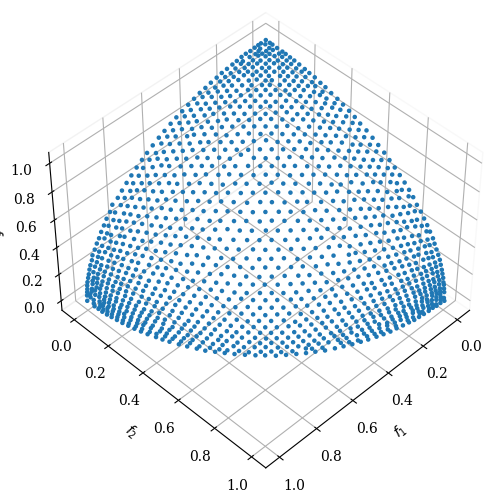

In [ ]:
from pymoo.algorithms.moo.nsga3 import NSGA3

from pymoo.optimize import minimize
from pymoo.problems import get_problem
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.visualization.scatter import Scatter

# create the reference directions to be used for the optimization
ref_dirs = get_reference_directions("das-dennis", 3, n_partitions=50)

# create the algorithm object
algorithm = NSGA3(pop_size=1326,
                  ref_dirs=ref_dirs)

# execute the optimization
res = minimize(get_problem("dtlz2"),
               algorithm,
               seed=1,
               termination=('n_gen', 100))

Scatter().add(res.F, s=5).show()

**Ideal and Nadir Point**

In [ ]:
ideal = [0, 0, 0]
nadir = [1, 1, 1]

**Start point**

In [ ]:
r_0 = np.array([0.2, 0.2, 1.25])
z_0 = np.array([1.55961029e-01, 1.56172986e-01, 9.75345032e-01]);

**Aspiration Level / Reference goal vector and Reference direction**

In [ ]:
asp = np.array([1.0, 0.0, 0.0]) # (Classification- {">","<","<"})
dir1 = asp - z_0

**Reference points**:

*In PR algorithm reference points and corresponding preferred solutions are computed iteratively. Here we are computing it simultaneously for generating Figure 1.*

In [ ]:
r_p = np.array([z_0 + 0.1*dir1, z_0 + 0.2*dir1, z_0 + 0.3*dir1, z_0 + 0.4*dir1 ,z_0 + 0.5*dir1])

# ref_point = z + t*ref_dir

# SPEED OPTIONS = ["1","2","3","4","5"]

# SPEED ["5","5","5","5","5"]

# t = ["5","5","5","5","5"]*(min(ideal point - nadir point))/(5*L) = [0.1, 0.1, 0.1, 0.1, 0.1]

# L = 10

# Increement in step size [0.1, 0.1, 0.1, 0.1, 0.1]

# [t1, t2, t3, t4, t5] = [0.1, 0.2, 0.3, 0.4, 0.5]

**Computing Preferred solutions in reference direction**

In [ ]:
# create the algorithm object
algorithm_r = RNSGA3(ref_points=r_p ,
    pop_per_ref_point=1,
    mu=0.01)

# execute the optimization
res_a = minimize(get_problem("dtlz2"),
               algorithm_r,
               seed=1,
               termination=('n_gen', 500))

**Plotting the Preferred Solutions**

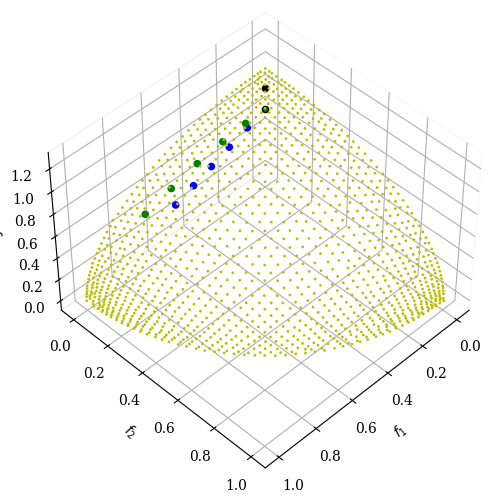

In [ ]:
plot = Scatter()
res_a.F = res_a.F[res_a.F[:,0]<1]; res_a.F = res_a.F[res_a.F[:,1]<0.8]; res_a.F = res_a.F[res_a.F[:,2]<1]         #EXCLUDING EXTREME SOLUTIONS

plot.add(res.F, s=1, facecolors='y', edgecolors='y')    # Yellow color points are Pareto Optimal Solutions
plot.add(r_0, s=20, facecolors='k', edgecolors='k')     # Black color point is user defined start point
plot.add(z_0, s=20, facecolors='g', edgecolors='k')     # Red point with black edge color is Pareto-Optimal point corresponding to user defined start point
plot.add(res_a.F, s=20, facecolors='g', edgecolors='g') # Red color points are MCDM Solutions
plot.add(r_p, s=20, facecolors='b', edgecolors='b')     # Blue color points are Referece points
plot.show()

**Changing the Aspiration Level and Reference direction**

In [ ]:
asp1 = [0, 1, 0]                                                                              #NEW ASPIRATION LEVEL  (Classification- {"<",">","<"})
dir_2 = asp1 - res_a.F[3,:]                                                                   #NEW REFERENCE DIRECTION

**Reference points**:

*In PR algorithm reference points and corresponding preferred solutions are computed iteratively. Here we are computing it simultaneously for generating Figure 1.*

In [ ]:
r_p1 = res_a.F[3,:] + np.array([dir_2*0.1, dir_2*0.2, dir_2*0.3, dir_2*0.36, dir_2*0.4])

# ref_point = z + t*ref_dir

# SPEED OPTIONS = ["1","2","3","4","5"]

# SPEED ["5","5","5","3","2"]

# t = ["5","5","5","3","2"]*(min(ideal point - nadir point))/(5*L) = [0.1, 0.1, 0.1, 0.06, 0.04]

# L = 10

# Increement in step size [0.1, 0.1, 0.1, 0.06, 0.04]

# [t1, t2, t3, t4, t5] = [0.1, 0.2, 0.3, 0.36, 0.40]

**Computing Preferred solutions in reference direction**

In [ ]:
# create the algorithm object
algorithm_r = RNSGA3(ref_points=r_p1 ,
    pop_per_ref_point=1,
    mu=0.01)

# execute the optimization
res_b = minimize(get_problem("dtlz2"),
               algorithm_r,
               seed=1,
               termination=('n_gen', 500))

**Plotting Start point, Reference Points, and MCDM Solutions**

Text(0.5, 0.92, 'Refer to Figure 1 in the manuscript')

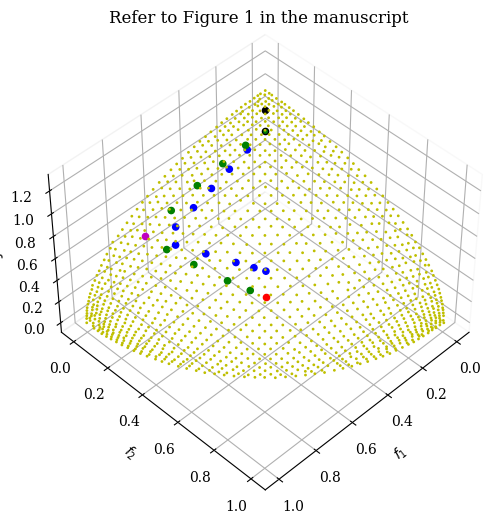

In [ ]:
plot = Scatter()
res_a.F = res_a.F[res_a.F[:,0]<1]; res_a.F = res_a.F[res_a.F[:,1]<0.8]; res_a.F = res_a.F[res_a.F[:,2]<1]   #EXCLUDING EXTREME SOLUTIONS
res_b.F = res_b.F[res_b.F[:,0]<1]; res_b.F = res_b.F[res_b.F[:,1]<1.0]; res_b.F = res_b.F[res_b.F[:,2]<1]   #EXCLUDING EXTREME SOLUTIONS

plot.add(res.F, s=1, facecolors='y', edgecolors='y')
plot.add(r_0, s=20, facecolors='k', edgecolors='k')                    # Black color point is user defined start point
plot.add(z_0, s=20, facecolors='g', edgecolors='k')                    # Red point with black edge color is Pareto-Optimal point corresponding to user defined start point
plot.add(res_a.F[[0,1,2,4],:], s=20, facecolors='g', edgecolors='g')   # Red color points are MCDM Solutions
plot.add(res_a.F[3,:], s=20, facecolors='m', edgecolors='m')           # Magenta color points represents change in reference direction/TURN
plot.add(res_b.F[[0,1,2,4],:], s=20, facecolors='g', edgecolors='g')   # Red color points are MCDM Solutions
plot.add(r_p, s=20, facecolors='b', edgecolors='b')                    # Blue color points are Referece points
plot.add(r_p1, s=20, facecolors='b', edgecolors='b')                   # Blue color points are Referece points
plot.add(res_b.F[3,:], s=20, facecolors='r', edgecolors='r')           # Green color point is Final Solution
plot.show()
plt.title('Refer to Figure 1 in the manuscript')

## **Benchmark Problem 1**

In [ ]:
import numpy as np
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.core.problem import ElementwiseProblem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

class MyProblem(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var=2,
                         n_obj=3,
                         n_constr=3,
                         xl=np.array([0,0]),
                         xu=np.array([4,6]))

    def _evaluate(self, x, out, *args, **kwargs):
        f1 = -x[0] -x[1] + 5
        f2 = (x[0]*x[0] + x[1]*x[1] -10*x[0] -4*x[1] + 11)/5
        f3 = (5-x[0])*(x[1]-11)
        #f4 = -x[2]

        g1 = (3*x[0] + x[1])/12 -1
        g2 = (2*x[0] + x[1])/9 -1
        g3 = (x[0] + 2*x[1])/12 -1

        out["F"] = [f1, f2, f3]
        out["G"] = [g1, g2, g3]


problem = MyProblem()

In [ ]:
import numpy as np
import math as ma
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.factory import get_problem, get_reference_directions
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
# create the reference directions to be used for the optimization
ref_dirs = get_reference_directions("das-dennis", 3, n_partitions=75)

# create the algorithm object
algorithm = NSGA3(pop_size=3000, ref_dirs=ref_dirs)
#algorithm = NSGA2(pop_size=500)
res = minimize(problem,
               algorithm,
               ("n_gen", 50),
               verbose=True,
               seed=1)

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |     3000 |    819 |  0.000000E+00 |  0.1095633099 |             - |             -
     2 |     6000 |    997 |  0.000000E+00 |  0.000000E+00 |  0.0221393604 |         ideal
     3 |     9000 |   1063 |  0.000000E+00 |  0.000000E+00 |  0.0057057923 |             f
     4 |    12000 |   1074 |  0.000000E+00 |  0.000000E+00 |  0.0026241259 |             f
     5 |    15000 |   1077 |  0.000000E+00 |  0.000000E+00 |  0.0020537225 |             f
     6 |    18000 |   1079 |  0.000000E+00 |  0.000000E+00 |  0.0075199822 |         ideal
     7 |    21000 |   1078 |  0.000000E+00 |  0.000000E+00 |  0.0013205385 |             f
     8 |    24000 |   1078 |  0.000000E+00 |  0.000000E+00 |  0.0019818671 |             f
     9 |    27000 |   1079 |  0.000000E+00 |  0.000000E+00 |  0.0024310274 |             f
    10 |    30000 |   1074 |  0.000000E+00 |  0.000000E+00 |  0.0118039697 |         nadir

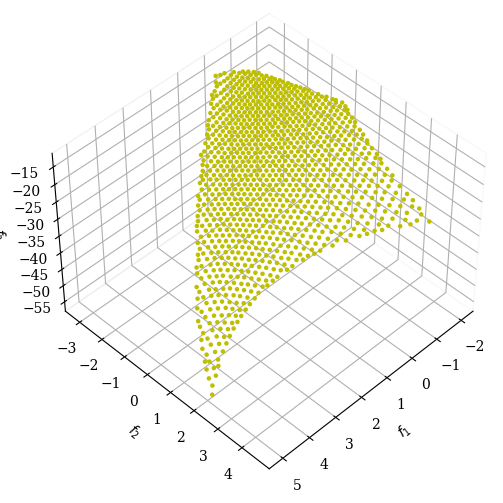

In [ ]:
plot = Scatter()
plot.add(res.F, color="y",s=5)
plot.show()

**Ideal and Nadir Point**

In [ ]:
ideal_a = np.array([-2, -3.1, -55]);
nadir_a = np.array([5, 4.6, -14.25]);

**Pareto Front**

In [ ]:
PF_data = res.F

**Start Point**

In [ ]:
r_0 = np.array([-2, 0, -20]);

**Pareto Optimal Start Point**

In [ ]:
dist_z0 = euclidean_distances(PF_data, [r_0])
idx = np.array(dist_z0).argmin()
z_0 = PF_data[idx,:]
print('Start PO point is:',z_0)

Start PO point is: [ -1.64046779   0.19251337 -19.86649893]


**Plotting PF and Start Point**

Text(0.5, 0.92, 'Refer to Figure 1 in the manuscript')

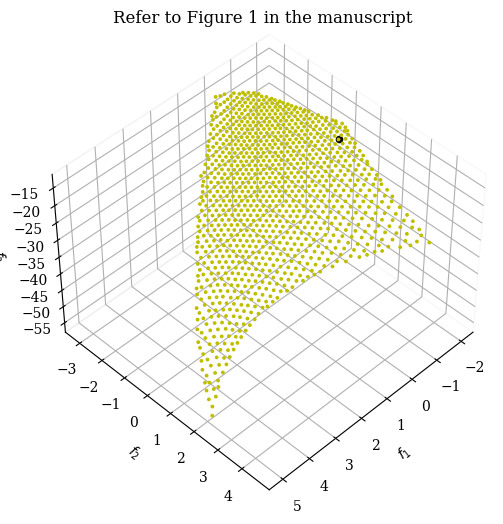

In [ ]:
plot = Scatter()
plot.add(PF_data, s=3, facecolors='y', edgecolors='y')
plot.add(z_0, s=20, facecolors='k', edgecolors='k')
plot.show()
plt.title('Refer to Figure 1 in the manuscript')

**DM's Aspiration**

In [ ]:
# Classification {"=","<","="}
asp = np.array([z_0[0], ideal_a[1], z_0[2]])
dir1 = asp - z_0
print('Reference direction is:',dir1)

Reference direction is: [ 0.         -3.29251337  0.        ]


**Computation of step size *t***

In [ ]:
given_speed = np.array([1,2,3,4,5]);
L = 20;
t = given_speed*min((nadir_a-ideal_a))/((max(given_speed)*L))
print('Possible Step Size is:',t)

Possible Step Size is: [0.07 0.14 0.21 0.28 0.35]


**Reference point 1 and Preferred solution 1 computation**

In [ ]:
rp1 = z_0 + t[1]*dir1 # Speed 2

dist_rp1 = euclidean_distances(PF_data, [rp1])
idx1 = np.array(dist_rp1).argmin()
z_1 = PF_data[idx1,:]
print('Reference point is:',rp1)
print('Preferred solution is:',z_1)

Reference point is: [ -1.64046779  -0.2684385  -19.86649893]
Preferred solution is: [ -1.53072995  -0.30060732 -19.73508904]


Text(0.5, 0.92, 'Refer to Figure 1 in the manuscript')

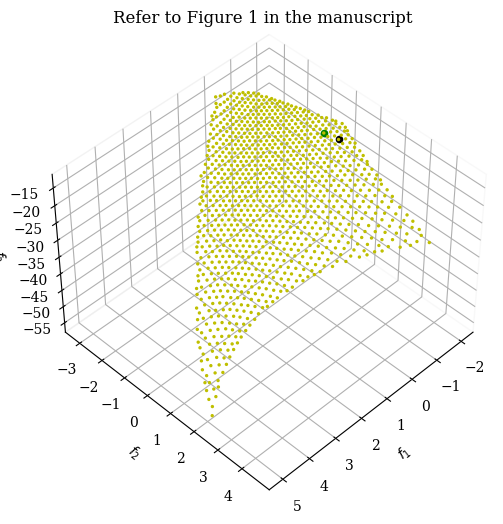

In [ ]:
plot = Scatter()
plot.add(PF_data, s=2, facecolors='y', edgecolors='y')
plot.add(z_0, s=20, facecolors='k', edgecolors='k')
plot.add(z_1, s=20, facecolors='g', edgecolors='g')
plot.show()
plt.title('Refer to Figure 1 in the manuscript')

**Reference point 2 and Preferred solution 2 computation**

In [ ]:
rp2 = rp1 + t[3]*dir1 # Speed 4

dist_rp2 = euclidean_distances(PF_data, [rp2])
idx2 = np.array(dist_rp2).argmin()
z_2 = PF_data[idx2,:]
print('Reference point is:',rp2)
print('Preferred solution is:',z_2)

Reference point is: [ -1.64046779  -1.19034224 -19.86649893]
Preferred solution is: [ -1.21944311  -1.03491244 -19.92313677]


Text(0.5, 0.92, 'Refer to Figure 1 in the manuscript')

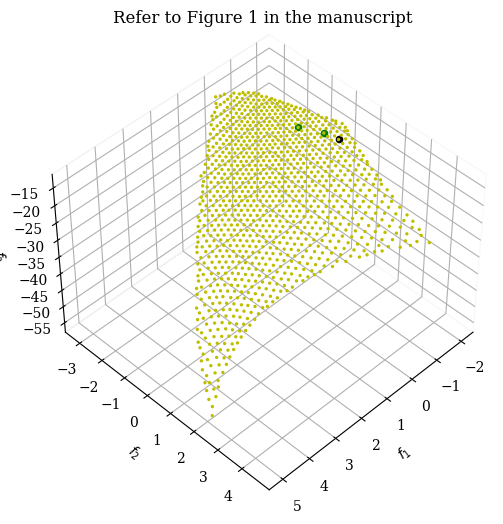

In [ ]:
plot = Scatter()
plot.add(PF_data, s=2, facecolors='y', edgecolors='y')
plot.add(z_0, s=20, facecolors='k', edgecolors='k')
plot.add(z_1, s=20, facecolors='g', edgecolors='g')
plot.add(z_2, s=20, facecolors='g', edgecolors='g')
plot.show()
plt.title('Refer to Figure 1 in the manuscript')

**Reference point 3 and Preferred solution 3 computation**

In [ ]:
rp3 = rp2 + t[4]*dir1 # Speed 5

dist_rp3 = euclidean_distances(PF_data, [rp3])
idx3 = np.array(dist_rp3).argmin()
z_3 = PF_data[idx3,:]
print('Reference point is:',rp3)
print('Preferred solution is:',z_3)

Reference point is: [ -1.64046779  -2.34272192 -19.86649893]
Preferred solution is: [ -0.81862907  -1.80761667 -19.82772732]


Text(0.5, 0.92, 'Refer to Figure 1 in the manuscript')

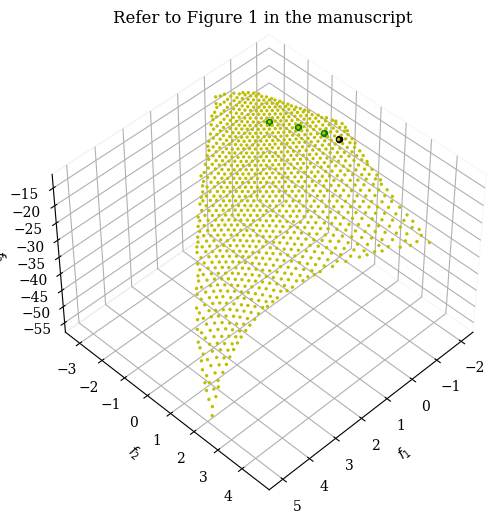

In [ ]:
plot = Scatter()
plot.add(PF_data, s=2, facecolors='y', edgecolors='y')
plot.add(z_0, s=20, facecolors='k', edgecolors='k')
plot.add(z_1, s=20, facecolors='g', edgecolors='g')
plot.add(z_2, s=20, facecolors='g', edgecolors='g')
plot.add(z_3, s=20, facecolors='g', edgecolors='g')
plot.show()
plt.title('Refer to Figure 1 in the manuscript')

**Reference point 4 and Preferred solution 4 computation**

In [ ]:
rp4 = rp3 + t[1]*dir1 # Speed 2

dist_rp4 = euclidean_distances(PF_data, [rp4])
idx4 = np.array(dist_rp4).argmin()
z_4 = PF_data[idx4,:]
print('Reference point is:',rp4)
print('Preferred solution is:',z_4)

Reference point is: [ -1.64046779  -2.8036738  -19.86649893]
Preferred solution is: [ -0.72747996  -2.05156548 -19.42101143]


Text(0.5, 0.92, 'Refer to Figure 1 in the manuscript')

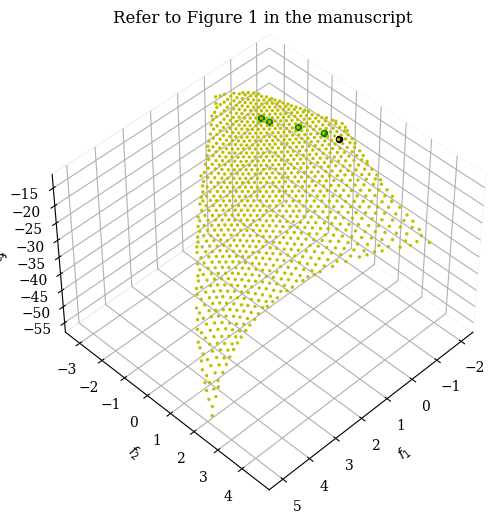

In [ ]:
plot = Scatter()
plot.add(PF_data, s=2, facecolors='y', edgecolors='y')
plot.add(z_0, s=20, facecolors='k', edgecolors='k')
plot.add(z_1, s=20, facecolors='g', edgecolors='g')
plot.add(z_2, s=20, facecolors='g', edgecolors='g')
plot.add(z_3, s=20, facecolors='g', edgecolors='g')
plot.add(z_4, s=20, facecolors='g', edgecolors='g')
plot.show()
plt.title('Refer to Figure 1 in the manuscript')

**Reference point 5 and Preferred solution 5 computation**

In [ ]:
rp5 = rp4 + t[1]*dir1 # Speed 2

dist_rp5 = euclidean_distances(PF_data, [rp5])
idx5 = np.array(dist_rp5).argmin()
z_5 = PF_data[idx5,:]
print('Reference point is:',rp5)
print('Preferred solution is:',z_5)

Reference point is: [  4.38271276   4.23286609 -51.78012487]
Preferred solution is: [  4.40049557   1.79134095 -51.99896365]


Text(0.5, 0.92, 'Refer to Figure 1 in the manuscript')

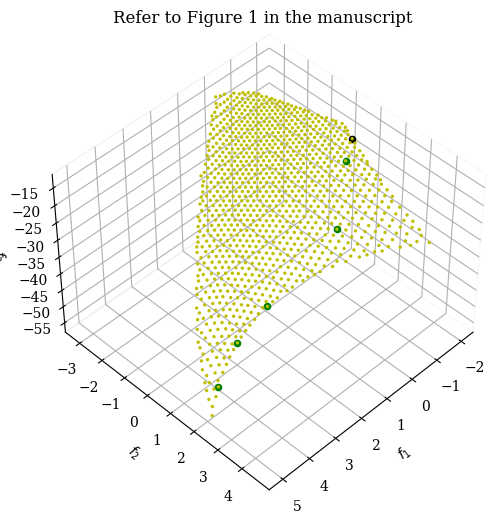

In [ ]:
plot = Scatter()
plot.add(PF_data, s=2, facecolors='y', edgecolors='y')
plot.add(z_0, s=20, facecolors='k', edgecolors='k')
plot.add(z_1, s=20, facecolors='g', edgecolors='g')
plot.add(z_2, s=20, facecolors='g', edgecolors='g')
plot.add(z_3, s=20, facecolors='g', edgecolors='g')
plot.add(z_4, s=20, facecolors='g', edgecolors='g')
plot.add(z_5, s=20, facecolors='g', edgecolors='g')
plot.show()
plt.title('Refer to Figure 1 in the manuscript')

**Reference point 6 and Preferred solution 6/final solution computation**

In [ ]:
rp6 = rp5 + t[1]*dir1 # Speed 2

dist_rp6 = euclidean_distances(PF_data, [rp6])
idx6 = np.array(dist_rp6).argmin()
z_6 = PF_data[idx6,:]
print('Reference point is:',rp6)
print('Preferred solution is:',z_6)

Reference point is: [  5.34293736   4.80396328 -56.78881951]
Preferred solution is: [  4.99763089   2.19770268 -54.98614071]


Text(0.5, 0.92, 'Refer to Figure 1 in the manuscript')

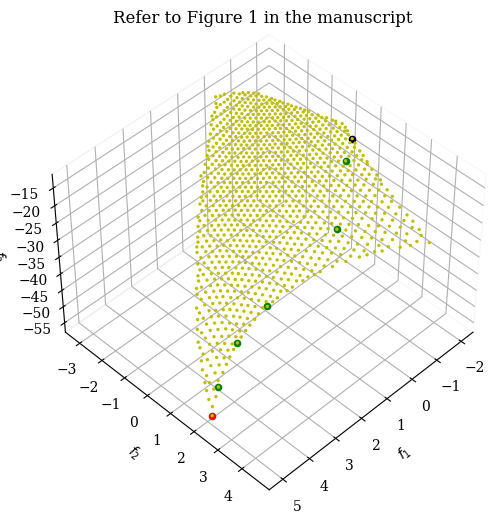

In [ ]:
plot = Scatter()
plot.add(PF_data, s=2, facecolors='y', edgecolors='y')
plot.add(z_0, s=20, facecolors='k', edgecolors='k')
plot.add(z_1, s=20, facecolors='g', edgecolors='g')
plot.add(z_2, s=20, facecolors='g', edgecolors='g')
plot.add(z_3, s=20, facecolors='g', edgecolors='g')
plot.add(z_4, s=20, facecolors='g', edgecolors='g')
plot.add(z_5, s=20, facecolors='g', edgecolors='g')
plot.add(z_6, s=20, facecolors='r', edgecolors='r')
plot.show()
plt.title('Refer to Figure 1 in the manuscript')

## **Visualization in *G* and *T* Space**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Article_plot.csv to Article_plot.csv


In [ ]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['Article_plot.csv']))
df.head()

F1        F2         F3         G         T
0  3.049938 -0.618893 -37.364265 -0.672125  1.642445
1  2.958740 -0.754740 -36.340837 -0.654618  1.436047
2  0.344978  1.854044 -31.180093 -0.418542  1.807402
3  0.788328 -2.609426 -20.527456 -0.306636  1.429651
4 -0.482065  2.111309 -27.019381 -0.305162  2.966056

### **RadViz Plot**

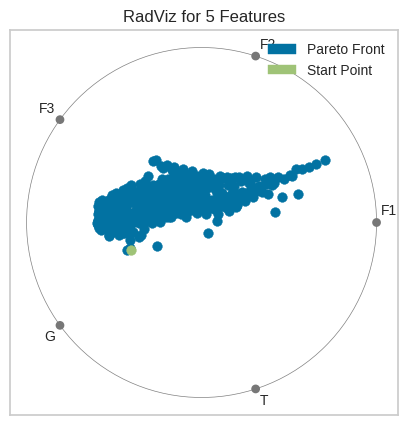

<Axes: title={'center': 'RadViz for 5 Features'}>

In [ ]:
from yellowbrick.datasets import load_occupancy
from yellowbrick.features import RadViz
import matplotlib.pyplot as plt

# Load the classification dataset
X1 = df[['F1','F2','F3','G','T']]
#X1 = X1[0:100]
start_p = pd.DataFrame([[-0.164, -3.083, -14.695, -0.189, 8.321]]);
start_p.columns = ['F1','F2','F3','G','T']

X = X1.append(start_p,ignore_index=True)
y = 0.5*np.ones(len(X))
y[len(X)-len(start_p) : len(X)] = 1.0;
classes = ["Pareto Front","Start Point"]

# Instantiate the visualizer
fig, axes = plt.subplots(figsize=(5,5))
visualizer = RadViz(classes=classes,c='jet', alpha = 1)

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
#plt.savefig("myimage.eps", dpi=300)
visualizer.show()              # Finalize and render the figure

### **Heat Maps**

<Axes: >

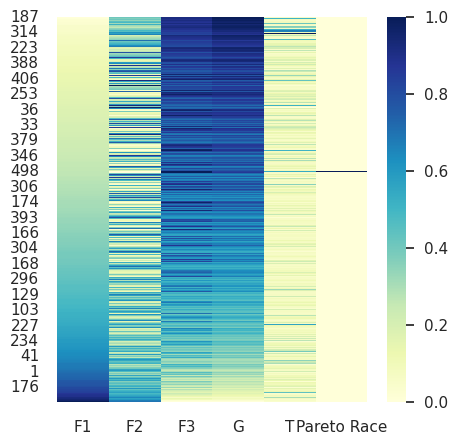

In [ ]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()

data1 = X
data1['Pareto Race'] = y
data = data1[['F1', 'F2', 'F3', 'G', 'T', 'Pareto Race']]
normalized_data=(data-data.min())/(data.max()-data.min())
data_new = normalized_data.sort_values('F1')

fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(data_new, cmap="YlGnBu",ax=ax)

### **PCP**

In [ ]:
import plotly.express as px
fig = px.parallel_coordinates(data[['F1', 'F2', 'F3', 'G', 'T', 'Pareto Race']],
                              color= "Pareto Race", labels={"F1", "F2", "F3", "G", "T", "Pareto Race"},
                              color_continuous_scale=px.colors.diverging.Tealrose,
                            color_continuous_midpoint=0.5)
fig.update_layout(
    font_color="black",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="green",
    font=dict(
        family="Times New Roman",
        size=22,
        color="black")
)
fig.show()

### ***t*-SNE**

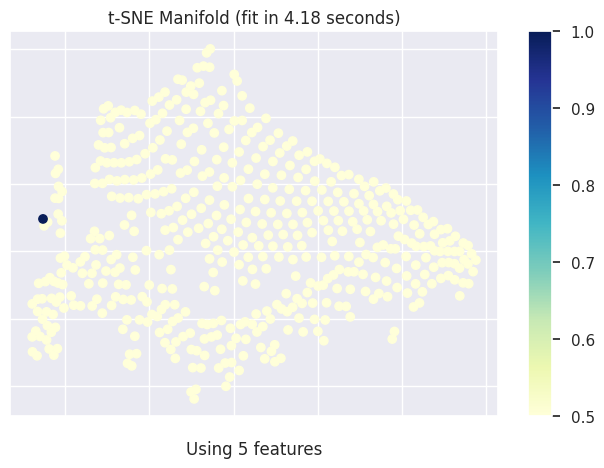

<Axes: title={'center': 't-SNE Manifold (fit in 4.18 seconds)'}, xlabel='Using 5 features'>

In [ ]:
from yellowbrick.features import Manifold
fig, axes = plt.subplots(figsize=(7,5))

X = data[['F1', 'F2', 'F3', 'G', 'T']]
y = data['Pareto Race'].values.tolist()

# Instantiate the visualizer
viz = Manifold(manifold="tsne", n_neighbors=10, colormap="YlGnBu", alpha = 1, ax = axes)
viz.fit_transform(X, y)              # Fit the data to the visualizer
viz.show()                           # Finalize and render the figure

## **iSOM Plot**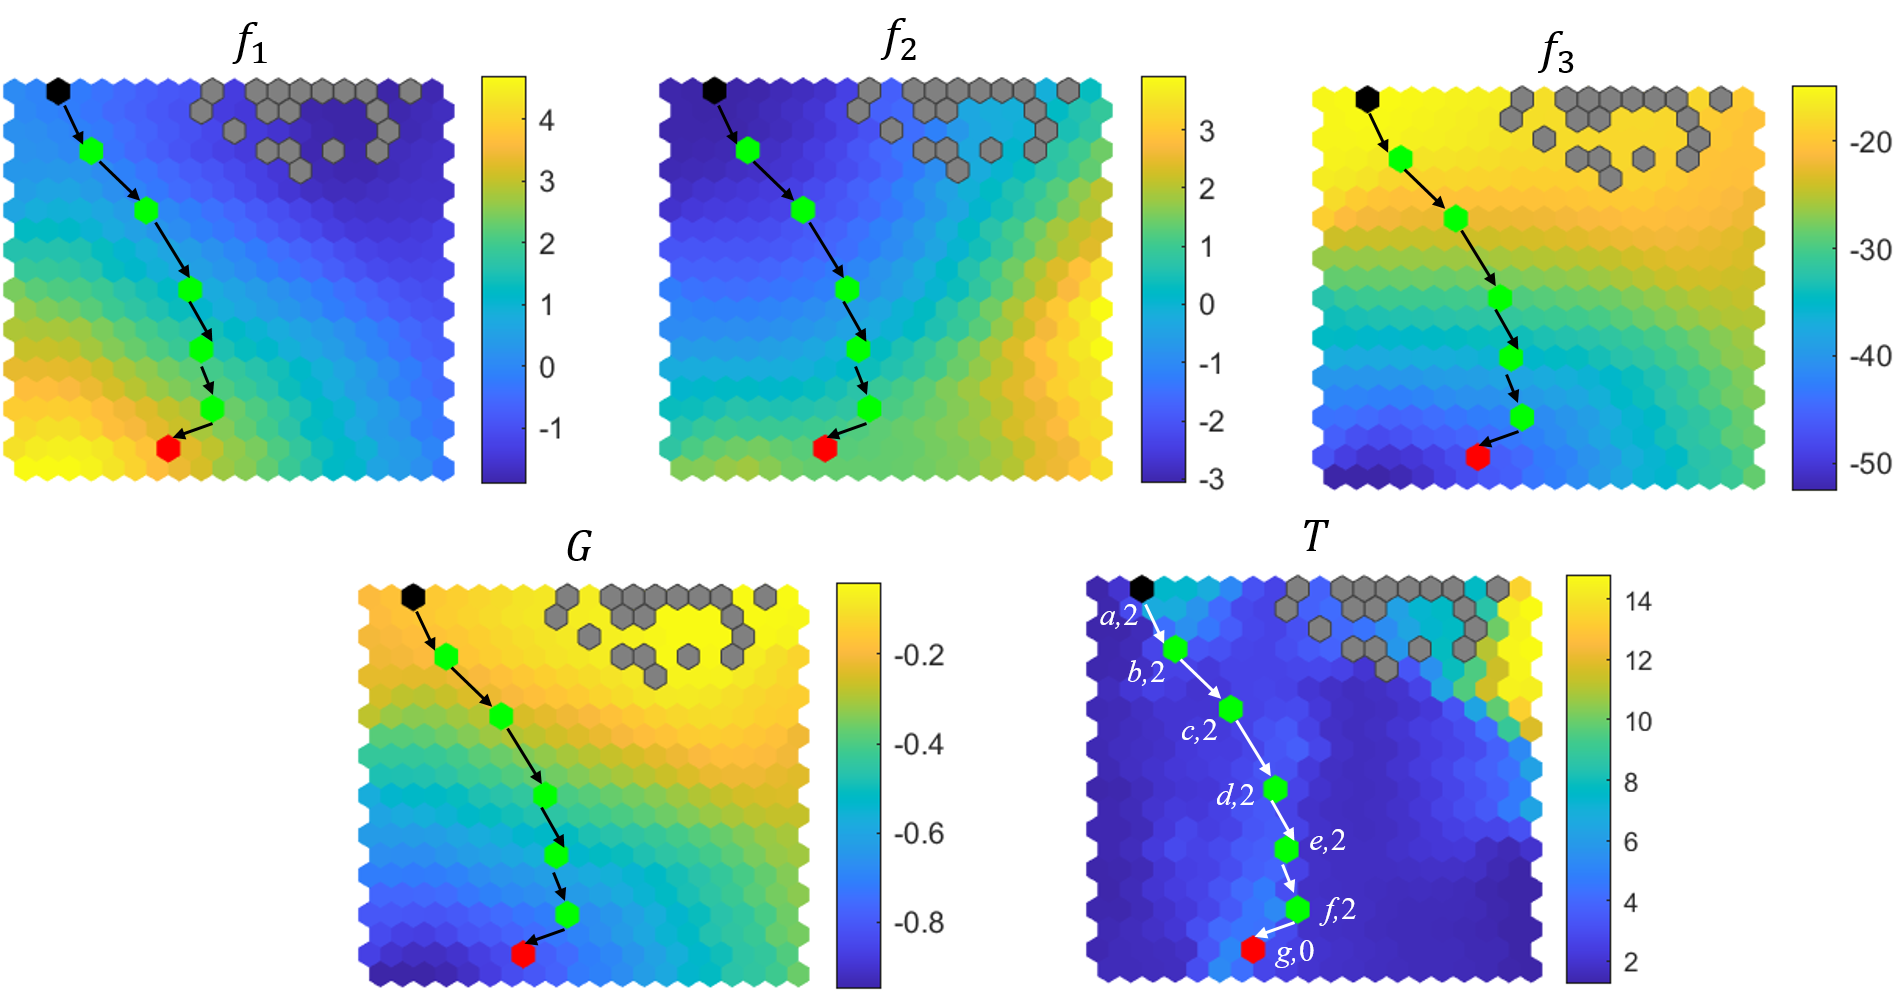

## **DPF-4 Problem: Benchmark Problem 2**

In [ ]:
import numpy as np
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.core.problem import ElementwiseProblem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

class MyProblem(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var=2,
                         n_obj=4,
                         n_constr=1,
                         xl=np.array([50, 50]),
                         xu=np.array([150, 150]),
                         elementwise_evaluation=True)

    def _evaluate(self, x, out, *args, **kwargs):
      f1 = ((x[0]-50)**2 + (x[1]-50)**2)**0.5
      f2 = ((x[0]-50)**2 + (x[1]-150)**2)**0.5
      f3 = ((x[0]-150)**2 + (x[1]-50)**2)**0.5
      f4 = ((x[0]-150)**2 + (x[1]-150)**2)**0.5
      g1 = ((x[0]-100)**2 + (x[1]-100)**2)-400
      g2 = 3025-((x[0]-100)**2 + (x[1]-100)**2)
      out["F"] = [f1, f2, f3, f4];
      out["G"] = [g1]

problem_a = MyProblem()

In [ ]:
import numpy as np
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.core.problem import ElementwiseProblem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

class MyProblem(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var=2,
                         n_obj=4,
                         n_constr=1,
                         xl=np.array([50, 50]),
                         xu=np.array([150, 150]),
                         elementwise_evaluation=True)

    def _evaluate(self, x, out, *args, **kwargs):
      f1 = ((x[0]-50)**2 + (x[1]-50)**2)**0.5
      f2 = ((x[0]-50)**2 + (x[1]-150)**2)**0.5
      f3 = ((x[0]-150)**2 + (x[1]-50)**2)**0.5
      f4 = ((x[0]-150)**2 + (x[1]-150)**2)**0.5
      g1 = ((x[0]-100)**2 + (x[1]-100)**2)-400
      g2 = 3025-((x[0]-100)**2 + (x[1]-100)**2)
      out["F"] = [f1, f2, f3, f4];
      out["G"] = [g2]

problem_b = MyProblem()

In [ ]:
import numpy as np
import math as ma
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.factory import get_problem, get_reference_directions
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
# create the reference directions to be used for the optimization
algorithm = NSGA2(pop_size=500)
res_a = minimize(problem_a,
               algorithm,
               ("n_gen", 50),
               verbose=True,
               seed=1)

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      500 |     60 |  0.000000E+00 |  1.288838E+03 |             - |             -
     2 |     1000 |    184 |  0.000000E+00 |  2.677321E+02 |  0.1016691066 |         ideal
     3 |     1500 |    463 |  0.000000E+00 |  1.2910416708 |  0.0268450645 |         ideal
     4 |     2000 |    500 |  0.000000E+00 |  0.000000E+00 |  0.0076720072 |         ideal
     5 |     2500 |    500 |  0.000000E+00 |  0.000000E+00 |  0.0091216200 |             f
     6 |     3000 |    500 |  0.000000E+00 |  0.000000E+00 |  0.0029024345 |         ideal
     7 |     3500 |    500 |  0.000000E+00 |  0.000000E+00 |  0.0078489170 |             f
     8 |     4000 |    500 |  0.000000E+00 |  0.000000E+00 |  0.0038083179 |         ideal
     9 |     4500 |    500 |  0.000000E+00 |  0.000000E+00 |  0.0034274470 |         ideal
    10 |     5000 |    500 |  0.000000E+00 |  0.000000E+00 |  0.0077827831 |             f

In [ ]:
import numpy as np
import math as ma
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.factory import get_problem, get_reference_directions
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
# create the reference directions to be used for the optimization
algorithm = NSGA2(pop_size=500)
res_b = minimize(problem_b,
               algorithm,
               ("n_gen", 50),
               verbose=True,
               seed=1)

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      500 |     60 |  0.000000E+00 |  1.428638E+03 |             - |             -
     2 |     1000 |    179 |  0.000000E+00 |  3.981072E+02 |  0.0288427618 |         ideal
     3 |     1500 |    459 |  0.000000E+00 |  3.7114044746 |  0.0180883572 |         ideal
     4 |     2000 |    500 |  0.000000E+00 |  0.000000E+00 |  0.0201512439 |         ideal
     5 |     2500 |    500 |  0.000000E+00 |  0.000000E+00 |  0.0025045605 |             f
     6 |     3000 |    500 |  0.000000E+00 |  0.000000E+00 |  0.0021248889 |             f
     7 |     3500 |    500 |  0.000000E+00 |  0.000000E+00 |  0.0034519704 |             f
     8 |     4000 |    500 |  0.000000E+00 |  0.000000E+00 |  0.0022383204 |             f
     9 |     4500 |    500 |  0.000000E+00 |  0.000000E+00 |  0.0034855408 |             f
    10 |     5000 |    500 |  0.000000E+00 |  0.000000E+00 |  0.0020518744 |             f

In [ ]:
PF_data = np.concatenate([res_a.F, res_b.F])

In [ ]:
PF_data

array([[ 73.30242698,  90.68312701,  50.73873591,  73.65190456],
       [ 73.23510295,  50.72788718,  90.69446622,  73.72533105],
       [ 74.21217313,  90.69025818,  50.74002919,  72.74494382],
       ...,
       [100.7091635 , 129.58716609,  16.76184672,  83.25537525],
       [ 89.59115204,  14.41524977, 127.04844213,  91.22790993],
       [ 14.6342172 ,  99.95726281,  85.41546763, 130.66405851]])

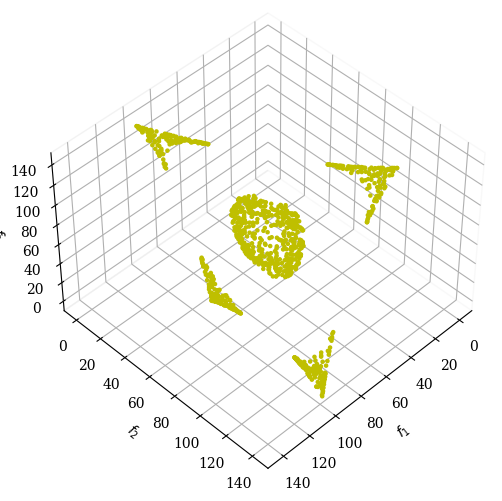

In [ ]:
plot = Scatter()
plot.add(PF_data[:,[0,1,2]], color="y",s=5)
plot.show()

**Start point, Ideal point, Nadir Point**

In [ ]:
ideal_a = np.array([0,0,0,0])
nadir_a = np.array([141.5, 141.5, 141.5, 141.5])
r_0 = np.array([75,75,75,75])

**Pareto Optimal Start Point**

In [ ]:
dist_z0 = euclidean_distances(PF_data, [r_0])
idx = np.array(dist_z0).argmin()
z_0 = PF_data[idx,:]
print('Start PO point is:',z_0)

Start PO point is: [70.19343845 69.88517915 71.5400328  71.23760072]


**Plotting Start Point**

Text(0.5, 0.92, 'Refer to Figure 1 in the manuscript')

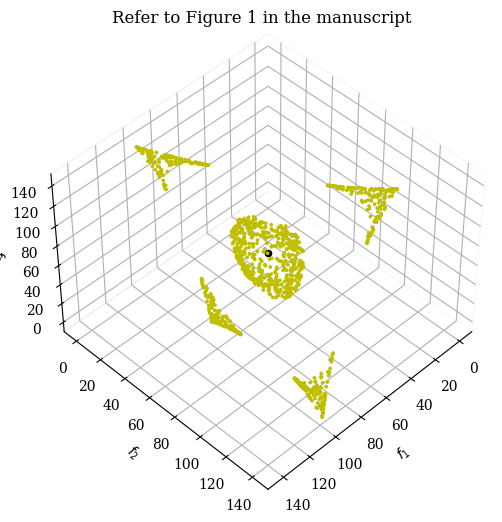

In [ ]:
plot = Scatter()
plot.add(PF_data[:,[0,1,2]], s=3, facecolors='y', edgecolors='y')
plot.add(z_0[[0,1,2]], s=20, facecolors='k', edgecolors='k')
plot.show()
plt.title('Refer to Figure 1 in the manuscript')

**DM's Aspiration**

In [ ]:
# CASE A: Classification {">","=","=","<"}
asp_a = np.array([nadir_a[0], z_0[1], z_0[2], ideal_a[3]])
dir_a1 = asp_a - z_0
print('Reference direction for CASE A is:',dir_a1)

# CASE B: Classification {"=",">","<","="}
asp_b = np.array([z_0[0], nadir_a[1], ideal_a[2], z_0[3]])
dir_b1 = asp_b - z_0
print('Reference direction for CASE B is:',dir_b1)

# CASE C: Classification {"<","=","=",">"}
asp_c = np.array([ideal_a[0], z_0[1], z_0[2], nadir_a[3]])
dir_c1 = asp_c - z_0
print('Reference direction for CASE C is:',dir_c1)

# CASE D: Classification {"=","<",">","="}
asp_d = np.array([z_0[0], ideal_a[1], nadir_a[2], z_0[3]])
dir_d1 = asp_d - z_0
print('Reference direction for CASE D is:',dir_d1)

Reference direction for CASE A is: [ 71.30656155   0.           0.         -71.23760072]
Reference direction for CASE B is: [  0.          71.61482085 -71.5400328    0.        ]
Reference direction for CASE C is: [-70.19343845   0.           0.          70.26239928]
Reference direction for CASE D is: [  0.         -69.88517915  69.9599672    0.        ]


**Computation of Step Size *t***

In [ ]:
given_speed = np.array([1, 2, 3, 4, 5]);
L = 200;
t = given_speed*min(0(nadir_a-ideal_a))/((max(given_speed)*L))
print('Possible Step Size is:',t)

Possible Step Size is: [0.1415 0.283  0.4245 0.566  0.7075]


**Reference Points 1 and MCDM Solutions 1**

In [ ]:
#CASE A
rp_a1 = z_0 + t[1]*dir_a1 # Speed 2

dist_rp_a1 = euclidean_distances(PF_data, [rp_a1])
idx_a1 = np.array(dist_rp_a1).argmin()
z_a1 = PF_data[idx_a1,:]
print('Reference point for CASE I is:',rp_a1)
print('Preferred solution for CASE I is:',z_a1)

#CASE B
rp_b1 = z_0 + t[1]*dir_b1 # Speed 2

dist_rp_b1 = euclidean_distances(PF_data, [rp_b1])
idx_b1 = np.array(dist_rp_b1).argmin()
z_b1 = PF_data[idx_b1,:]
print('Reference point for CASE I is:',rp_b1)
print('Preferred solution for CASE I is:',z_b1)

#CASE C
rp_c1 = z_0 + t[1]*dir_c1 # Speed 2

dist_rp_c1 = euclidean_distances(PF_data, [rp_c1])
idx_c1 = np.array(dist_rp_c1).argmin()
z_c1 = PF_data[idx_c1,:]
print('Reference point for CASE I is:',rp_c1)
print('Preferred solution for CASE I is:',z_c1)

#CASE D
rp_d1 = z_0 + t[1]*dir_d1 # Speed 2

dist_rp_d1 = euclidean_distances(PF_data, [rp_d1])
idx_d1 = np.array(dist_rp_d1).argmin()
z_d1 = PF_data[idx_d1,:]
print('Reference point for CASE I is:',rp_d1)
print('Preferred solution for CASE I is:',z_d1)

Reference point for CASE I is: [90.37319537 69.88517915 71.5400328  51.07735971]
Preferred solution for CASE I is: [89.54504576 72.71636041 73.63528227 51.8797518 ]
Reference point for CASE I is: [70.19343845 90.15217345 51.29420352 71.23760072]
Preferred solution for CASE I is: [72.75860634 89.08974098 52.33308687 73.3615644 ]
Reference point for CASE I is: [50.32869537 69.88517915 71.5400328  91.12185971]
Preferred solution for CASE I is: [50.94318072 72.59979161 74.24831247 90.48941366]
Reference point for CASE I is: [70.19343845 50.10767345 91.33870352 71.23760072]
Preferred solution for CASE I is: [72.80811829 50.78802832 90.64048624 74.12219288]


**Plotting Preferred Solutions**

Text(0.5, 0.92, 'Refer to Figure 1 in the manuscript')

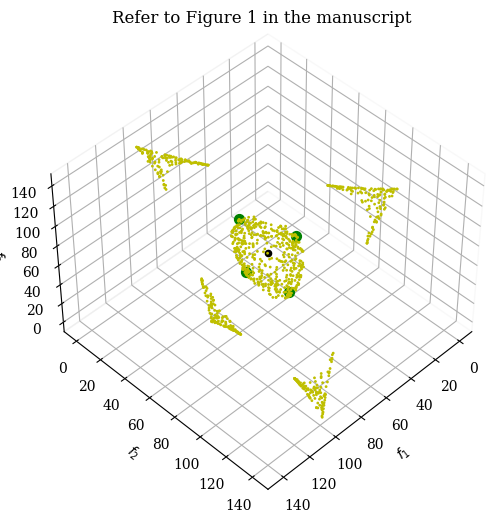

In [ ]:
plot = Scatter()
plot.add(PF_data[:,[0,1,2]], s=1, facecolors='y', edgecolors='y')
plot.add(z_0[[0,1,2]], s=20, facecolors='k', edgecolors='k')
plot.add(z_a1[[0,1,2]], s=50, facecolors='g', edgecolors='g')
plot.add(z_b1[[0,1,2]], s=50, facecolors='g', edgecolors='g')
plot.add(z_c1[[0,1,2]], s=50, facecolors='g', edgecolors='g')
plot.add(z_d1[[0,1,2]], s=50, facecolors='g', edgecolors='g')
plot.show()
plt.title('Refer to Figure 1 in the manuscript')

**Referece Points 2 and Preferred Solution 2**

In [ ]:
#CASE A
rp_a2 = z_0 + t[4]*dir_a1 # Speed 2

dist_rp_a2 = euclidean_distances(PF_data, [rp_a2])
idx_a2 = np.array(dist_rp_a2).argmin()
z_a2 = PF_data[idx_a2,:]
print('Reference point for CASE I is:',rp_a2)
print('Preferred solution for CASE I is:',z_a2)

#CASE B
rp_b2 = z_0 + t[4]*dir_b1 # Speed 2

dist_rp_b2 = euclidean_distances(PF_data, [rp_b2])
idx_b2 = np.array(dist_rp_b2).argmin()
z_b2 = PF_data[idx_b2,:]
print('Reference point for CASE I is:',rp_b2)
print('Preferred solution for CASE I is:',z_b2)

#CASE C
rp_c2 = z_0 + t[4]*dir_c1 # Speed 2

dist_rp_c2 = euclidean_distances(PF_data, [rp_c2])
idx_c2 = np.array(dist_rp_c2).argmin()
z_c2 = PF_data[idx_c2,:]
print('Reference point for CASE I is:',rp_c2)
print('Preferred solution for CASE I is:',z_c2)

#CASE D
rp_d2 = z_0 + t[4]*dir_d1 # Speed 2

dist_rp_d2 = euclidean_distances(PF_data, [rp_d2])
idx_d2 = np.array(dist_rp_d2).argmin()
z_d2 = PF_data[idx_d2,:]
print('Reference point for CASE I is:',rp_d2)
print('Preferred solution for CASE I is:',z_d2)

Reference point for CASE I is: [120.64283075  69.88517915  71.5400328   20.83699821]
Preferred solution for CASE I is: [125.69332114  83.17847041  95.92106888  17.90805448]
Reference point for CASE I is: [ 70.19343845 120.5526649   20.92545959  71.23760072]
Preferred solution for CASE I is: [ 90.13295655 125.76106539  15.67586347  89.09336904]
Reference point for CASE I is: [ 20.53158075  69.88517915  71.5400328  120.94824821]
Preferred solution for CASE I is: [ 15.5569182   88.78893659  90.6241449  125.91343533]
Reference point for CASE I is: [ 70.19343845  20.4414149  121.03670959  71.23760072]
Preferred solution for CASE I is: [ 93.13946103  16.38251466 125.74582763  86.05487059]


**Plotting Preferred Solutions**

Text(0.5, 0.92, 'Refer to Figure 1 in the manuscript')

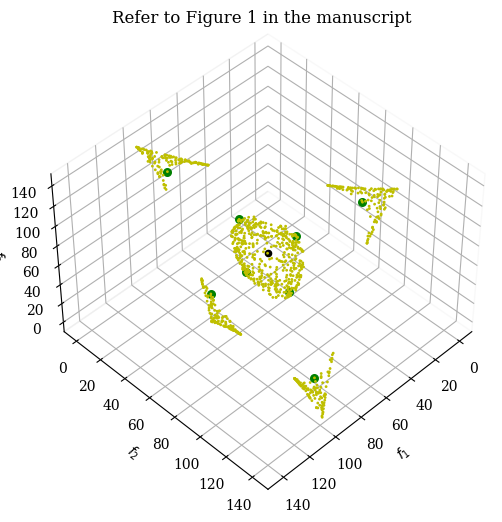

In [ ]:
plot = Scatter()
plot.add(PF_data[:,[0,1,2]], s=1, facecolors='y', edgecolors='y')
plot.add(z_0[[0,1,2]], s=20, facecolors='k', edgecolors='k')
plot.add(z_a1[[0,1,2]], s=30, facecolors='g', edgecolors='g')
plot.add(z_b1[[0,1,2]], s=30, facecolors='g', edgecolors='g')
plot.add(z_c1[[0,1,2]], s=30, facecolors='g', edgecolors='g')
plot.add(z_d1[[0,1,2]], s=30, facecolors='g', edgecolors='g')
plot.add(z_a2[[0,1,2]], s=30, facecolors='g', edgecolors='g')
plot.add(z_b2[[0,1,2]], s=30, facecolors='g', edgecolors='g')
plot.add(z_c2[[0,1,2]], s=30, facecolors='g', edgecolors='g')
plot.add(z_d2[[0,1,2]], s=30, facecolors='g', edgecolors='g')
plot.show()
plt.title('Refer to Figure 1 in the manuscript')

**DM Changes Aspiration Level**

In [ ]:
# CASE A: Classification {"=",">","<","="}
asp_a2 = np.array([z_a2[0], nadir_a[1], ideal_a[3], z_a2[3]])
dir_a2 = asp_a2 - z_a2
print('Reference direction for CASE A is:',dir_a2)

# CASE B: Classification {"=",">","<","="}
asp_b2 = np.array([nadir_a[0], z_b2[1], z_b2[2], ideal_a[3]])
dir_b2 = asp_b2 - z_b2
print('Reference direction for CASE B is:',dir_b2)

# CASE C: Classification {"<","=","=",">"}
# No Change

# CASE D: Classification {"=","<",">","="}
# No Change

Reference direction for CASE A is: [  0.          58.32152959 -95.92106888   0.        ]
Reference direction for CASE B is: [ 51.36704345   0.           0.         -89.09336904]


**Compute Reference Points and MCDM Solutions**

In [ ]:
#CASE A
rp_a3 = z_a2 + t[1]*dir_a2 # Speed 2

dist_rp_a3 = euclidean_distances(PF_data, [rp_a3])
idx_a3 = np.array(dist_rp_a3).argmin()
z_a3 = PF_data[idx_a3,:]
print('Reference point for CASE I is:',rp_a3)
print('Preferred solution for CASE I is:',z_a3)

#CASE B
rp_b3 = z_b2 + t[1]*dir_b2 # Speed 2

dist_rp_b3 = euclidean_distances(PF_data, [rp_b3])
idx_b3 = np.array(dist_rp_b3).argmin()
z_b3 = PF_data[idx_b3,:]
print('Reference point for CASE I is:',rp_b3)
print('Preferred solution for CASE I is:',z_b3)

#CASE C
rp_c3 = z_c2 + t[1]*dir_c1 # Speed 2

dist_rp_c3 = euclidean_distances(PF_data, [rp_c3])
idx_c3 = np.array(dist_rp_c3).argmin()
z_c3 = PF_data[idx_c3,:]
print('Reference point for CASE I is:',rp_c3)
print('Preferred solution for CASE I is:',z_c3)

#CASE D
rp_d3 = z_d2 + t[1]*dir_d1 # Speed 2

dist_rp_d3 = euclidean_distances(PF_data, [rp_d3])
idx_d3 = np.array(dist_rp_d3).argmin()
z_d3 = PF_data[idx_d3,:]
print('Reference point for CASE I is:',rp_d3)
print('Preferred solution for CASE I is:',z_d3)

Reference point for CASE I is: [125.69332114  99.68346328  68.77540639  17.90805448]
Preferred solution for CASE I is: [124.97061934 102.44181121  75.61832387  24.38851967]
Reference point for CASE I is: [104.66982984 125.76106539  15.67586347  63.8799456 ]
Preferred solution for CASE I is: [103.24049404 124.56945779  25.70525125  74.29475181]
Reference point for CASE I is: [ -4.30782488  88.78893659  90.6241449  145.79769432]
Preferred solution for CASE I is: [  2.83873611  97.85105545  98.18916754 138.59250792]
Reference point for CASE I is: [ 93.13946103  -3.39499103 145.54449835  86.05487059]
Preferred solution for CASE I is: [ 98.9847305    3.39027569 138.39948363  96.78808897]


Text(0.5, 0.92, 'Refer to Figure 1 in the manuscript')

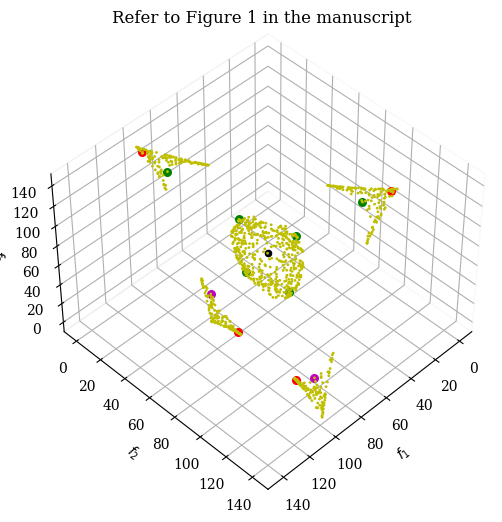

In [ ]:
plot = Scatter()
plot.add(PF_data[:,[0,1,2]], s=1, facecolors='y', edgecolors='y')
plot.add(z_0[[0,1,2]], s=20, facecolors='k', edgecolors='k')
plot.add(z_a1[[0,1,2]], s=30, facecolors='g', edgecolors='g')
plot.add(z_b1[[0,1,2]], s=30, facecolors='g', edgecolors='g')
plot.add(z_c1[[0,1,2]], s=30, facecolors='g', edgecolors='g')
plot.add(z_d1[[0,1,2]], s=30, facecolors='g', edgecolors='g')

plot.add(z_a2[[0,1,2]], s=30, facecolors='m', edgecolors='m')
plot.add(z_b2[[0,1,2]], s=30, facecolors='m', edgecolors='m')
plot.add(z_c2[[0,1,2]], s=30, facecolors='g', edgecolors='g')
plot.add(z_d2[[0,1,2]], s=30, facecolors='g', edgecolors='g')

plot.add(z_a3[[0,1,2]], s=30, facecolors='r', edgecolors='r')
plot.add(z_b3[[0,1,2]], s=30, facecolors='r', edgecolors='r')
plot.add(z_c3[[0,1,2]], s=30, facecolors='r', edgecolors='r')
plot.add(z_d3[[0,1,2]], s=30, facecolors='r', edgecolors='r')
plot.show()
plt.title('Refer to Figure 1 in the manuscript')

## **Visualizing in *G* and *T* Space**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DPF4_plot.csv to DPF4_plot.csv


In [ ]:
import io
import pandas as pd

df = pd.read_csv(io.BytesIO(uploaded['DPF4_plot.csv']))
df = df
df.head()

F1          F2            F3          F4         G         T
0  141.421354   99.999996  1.000000e+02    0.000004 -1.000000  1.606405
1  100.000000  141.421356  4.513748e-07  100.000000 -1.000000  1.747604
2    0.000004   99.999996  1.000000e+02  141.421352 -1.000000  1.731519
3  100.000000    0.000002  1.414214e+02   99.999998 -1.000000  1.710947
4  103.601518  123.763510  2.707934e+01   72.920660 -0.000079  1.291751

### **RadViz Plot**

<ipython-input-13-691e2e70db73>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



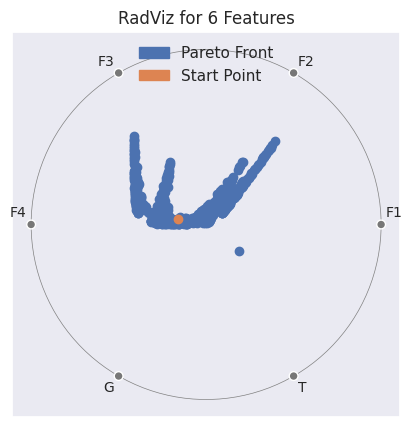

<Axes: title={'center': 'RadViz for 6 Features'}>

In [ ]:
from yellowbrick.datasets import load_occupancy
from yellowbrick.features import RadViz
import matplotlib.pyplot as plt

# Load the classification dataset
X1 = df[['F1','F2','F3','F4','G','T']]
X1 = X1[1:500]
start_p = pd.DataFrame([[70.193, 69.885, 71.540, 71.237, -0.1, 1.258]]);
start_p.columns = ['F1','F2','F3','F4','G','T']

X = X1.append(start_p,ignore_index=True)
y = 0.5*np.ones(len(X))
y[len(X)-len(start_p) : len(X)] = 1.0;
classes = ["Pareto Front","Start Point"]

# Instantiate the visualizer
fig, axes = plt.subplots(figsize=(5,5))
visualizer = RadViz(classes=classes,c='jet', alpha = 1)

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
#plt.savefig("myimage.eps", dpi=300)
visualizer.show()              # Finalize and render the figure

### **Heat Maps**

<Axes: >

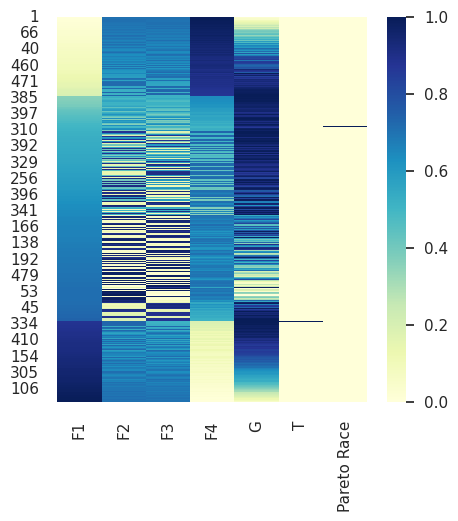

In [ ]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()

data1 = X
data1['Pareto Race'] = y
data = data1[['F1', 'F2', 'F3', 'F4', 'G', 'T', 'Pareto Race']]
normalized_data=(data-data.min())/(data.max()-data.min())
data_new = normalized_data.sort_values('F1')

fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(data_new, cmap="YlGnBu",ax=ax)

### **PCP**

In [ ]:
import plotly.express as px
fig = px.parallel_coordinates(data[['F1', 'F2', 'F3', 'F4', 'G', 'T', 'Pareto Race']],
                              color= "Pareto Race", labels={"F1", "F2", "F3", "F4", "G", "T", "Pareto Race"},
                              color_continuous_scale=px.colors.diverging.Tealrose,
                            color_continuous_midpoint=0.5)
fig.update_layout(
    font_color="black",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="green",
    font=dict(
        family="Times New Roman",
        size=22,
        color="black")
)
fig.show()

### ***t*-SNE**

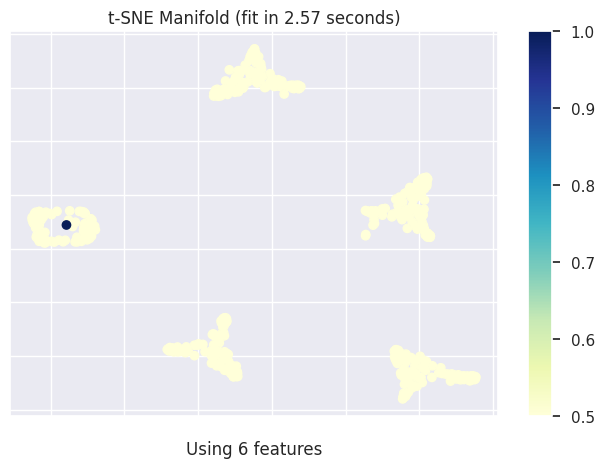

<Axes: title={'center': 't-SNE Manifold (fit in 2.57 seconds)'}, xlabel='Using 6 features'>

In [ ]:
from yellowbrick.features import Manifold
fig, axes = plt.subplots(figsize=(7,5))

X = data[['F1', 'F2', 'F3', 'F4', 'G', 'T']]
y = data['Pareto Race'].values.tolist()

# Instantiate the visualizer
viz = Manifold(manifold="tsne", n_neighbors=10, colormap="YlGnBu", alpha = 1, ax = axes)
viz.fit_transform(X, y)              # Fit the data to the visualizer
viz.show()                           # Finalize and render the figure

## **iSOM Plot**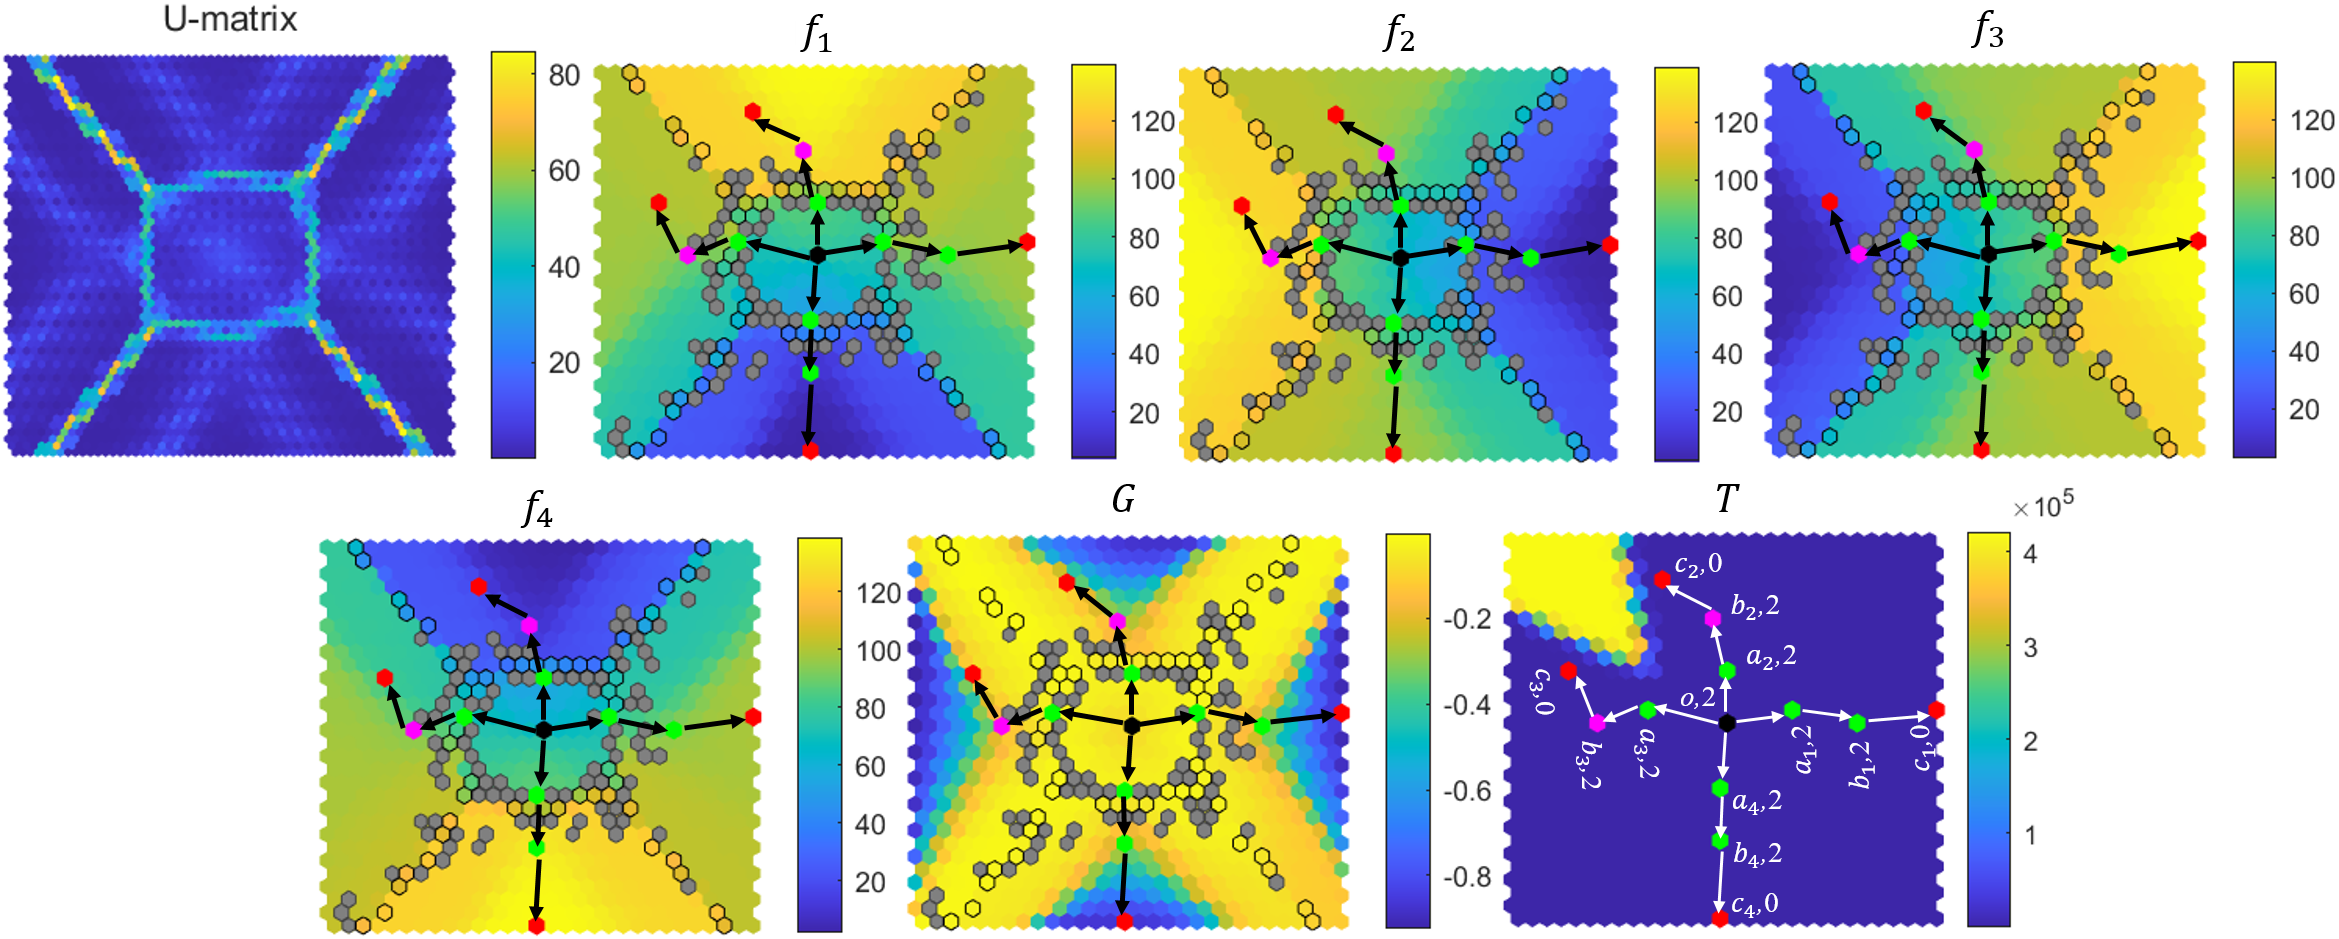

## **GAA Problem**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving GAA_plot.csv to GAA_plot.csv


In [ ]:
import io
import pandas as pd

df = pd.read_csv(io.BytesIO(uploaded['GAA_plot.csv']))
df = df
df.head()

F1           F2         F3        F4          F5            F6  \
0  73.887178  1829.182247  63.033754  1.933121  527.986573  41372.288709   
1  75.184978  1909.458699  64.041682  2.236977  485.816591  43761.602137   
2  73.318950  1963.967517  86.299420  2.511703  408.474944  43748.106241   
3  75.110609  2103.266600  95.150116  2.456031  229.709506  46794.767968   
4  73.437675  1829.062336  79.774942  1.941811  526.141050  41415.691976   

            F7         F8          F9       F10         G         T         R  
0 -1962.476803 -15.177098 -202.294065  1.636705 -1.284375  3.893127  0.010944  
1 -1132.850948 -18.253034 -209.382187  1.913060 -0.228668  4.731823  0.026869  
2 -2848.808353 -20.195602 -193.950196  0.253476 -1.315391  4.923533  0.007896  
3 -1465.669390 -18.371234 -189.638928  2.248644 -0.416230  1.713089  0.028598  
4 -2005.024787 -15.173795 -203.074938  1.371071 -1.054770  5.571670  0.029460

**Pareto Front Data**

In [ ]:
PF_data = np.array(df[['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10']])

**Ideal Point, Nadir Point, and Start Point**

In [ ]:
ideal_g = np.array([73.203, 1829.062,	55.391,	1.778, 229.709,	41372.288, -3080.952,	-20.503, -209.382,	0.253])
nadir_g = np.array([75.232, 2154.282, 97.541,	2.623, 549.669,	47982.543, -896.496,	-13.992, -182.882,	4.421])
z_0   = np.array([73.246, 2115.349, 87.119, 2.388, 331.409, 46531.275, -2354.166, -19.296, -187.258, 2.042])

**DM aspiration**

In [ ]:
# Classification 𝐼< = {2, 3, 4, 6, 9}, 𝐼= = {1, 7, 10}, and 𝐼> = {5, 8},
asp_g = np.array([z_0[0], ideal_g[1], ideal_g[2], ideal_g[3], nadir_g[4], ideal_g[5], z_0[6] ,nadir_g[7] ,ideal_g[8], z_0[9]])
dir1 = asp_g - z_0
print('Reference direction is:',dir1)

Reference direction is: [ 0.000000e+00 -2.862870e+02 -3.172800e+01 -6.100000e-01  2.182600e+02
 -5.158987e+03  0.000000e+00  5.304000e+00 -2.212400e+01  0.000000e+00]


**Step size *t* calculation**

In [ ]:
given_speed = np.array([1,2,3,4,5]);
L = 1.15;
t = given_speed*min((nadir_g-ideal_g))/((max(given_speed)*L))
print('Possible Step Size is:',t)

Possible Step Size is: [0.14695652 0.29391304 0.44086957 0.58782609 0.73478261]


**Reference point 1 and MCDM solution 1**

In [ ]:
rp1 = z_0 + t[3]*dir1 # Speed 4

dist_rp1 = euclidean_distances(PF_data, [rp1])
idx1 = np.array(dist_rp1).argmin()
z_1 = PF_data[idx1,:]
print('Reference point is:',rp1)
print('Preferred solution is:',z_1)

Reference point is: [ 7.32460000e+01  1.94706203e+03  6.84684539e+01  2.02942609e+00
  4.59707922e+02  4.34986879e+04 -2.35416600e+03 -1.61781704e+01
 -2.00263064e+02  2.04200000e+00]
Preferred solution is: [ 7.41118414e+01  1.92861274e+03  7.54431440e+01  2.52660326e+00
  4.49581688e+02  4.33991407e+04 -2.52162594e+03 -1.61381771e+01
 -1.92335869e+02  2.25638993e+00]


In [ ]:
[73.293, 1950.277, 75.001, 2.263, 447.820, 43172.464, -2756.465, -16.175, -189.347, 2.053]

**DM changes aspiration level**

In [ ]:
# Classification 𝐼< = {2, 3, 4, 6, 9}, 𝐼= = {10}, and 𝐼> = {1, 5, 7, 8},
asp_g2 = np.array([nadir_g[0], ideal_g[1], ideal_g[2], ideal_g[3], nadir_g[4], ideal_g[5], nadir_g[6] ,nadir_g[7] ,ideal_g[8], z_1[9]])
dir2 = asp_g2 - z_1
print('Reference direction is:',dir2)

Reference direction is: [ 1.12015864e+00 -9.95507420e+01 -2.00521440e+01 -7.48603256e-01
  1.00087312e+02 -2.02685273e+03  1.62512994e+03  2.14617711e+00
 -1.70461315e+01  0.00000000e+00]


**Reference point 2 and MCDM solution 2**

In [ ]:
rp2 = z_1 + t[2]*dir2

dist_rp2 = euclidean_distances(PF_data, [rp2])
idx2 = np.array(dist_rp2).argmin()
z_2 = PF_data[idx2,:]
print('Reference point is:',rp2)
print('Preferred solution is:',z_2)

Reference point is: [ 7.46056852e+01  1.88472385e+03  6.66027640e+01  2.19656686e+00
  4.93707138e+02  4.25055630e+04 -1.80515561e+03 -1.51919929e+01
 -1.99850989e+02  2.25638993e+00]
Preferred solution is: [ 7.45117779e+01  1.87195761e+03  6.32779076e+01  2.21462682e+00
  4.70149778e+02  4.25517314e+04 -1.84084223e+03 -1.53686301e+01
 -1.97107829e+02  2.27681951e+00]


In [ ]:
[73.963, 1919.396, 70.024, 2.211, 469.359, 43184.453, -1823.520, -17.248, -198.564, 2.015]

**Reference point 3 and MCDM solution 3**

In [ ]:
rp3 = z_1 + 2*t[2]*dir2

dist_rp3 = euclidean_distances(PF_data, [rp3])
idx3 = np.array(dist_rp3).argmin()
z_3 = PF_data[idx3,:]
print('Reference point is:',rp3)
print('Preferred solution is:',z_3)

Reference point is: [ 7.50995291e+01  1.84083496e+03  5.77623840e+01  1.86653047e+00
  5.37832587e+02  4.16119854e+04 -1.08868528e+03 -1.42458088e+01
 -2.07366110e+02  2.25638993e+00]
Preferred solution is: [ 7.41413705e+01  1.83807610e+03  6.66194205e+01  2.02515893e+00
  5.02915524e+02  4.19060338e+04 -1.68009043e+03 -1.51156346e+01
 -2.02085839e+02  2.38197507e+00]


In [ ]:
[74.393, 1897.485, 60.799, 2.179, 474.166, 43107.813, -1580.070, -17.952, -205.212, 2.011]

## **Visualization in *G* and *T* Spaces**

### **RadViz Plot**

<ipython-input-18-7168ae3fd457>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



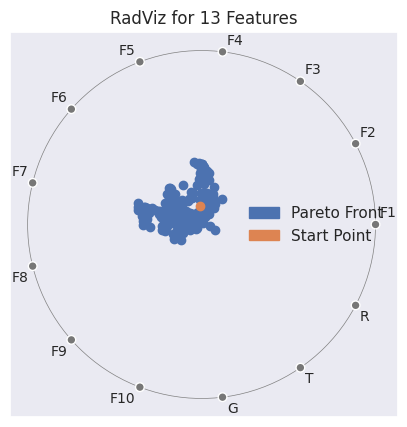

<Axes: title={'center': 'RadViz for 13 Features'}>

In [ ]:
from yellowbrick.datasets import load_occupancy
from yellowbrick.features import RadViz
import matplotlib.pyplot as plt

# Load the classification dataset
X1 = df[['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','G','T','R']]
X1 = X1[1:200]
start_p = pd.DataFrame([[73.246, 2115.349, 87.119, 2.388, 331.409, 46531.275,-2354.166, -19.296, -187.258, 2.042,-1,6,0.05]]);
start_p.columns = ['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','G','T','R']

X = X1.append(start_p,ignore_index=True)
y = 0.5*np.ones(len(X))
y[len(X)-len(start_p) : len(X)] = 1.0;
classes = ["Pareto Front","Start Point"]

# Instantiate the visualizer
fig, axes = plt.subplots(figsize=(5,5))
visualizer = RadViz(classes=classes,c='jet', alpha = 1)

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
#plt.savefig("myimage.eps", dpi=300)
visualizer.show()              # Finalize and render the figure

### **Heat Map**

<Axes: >

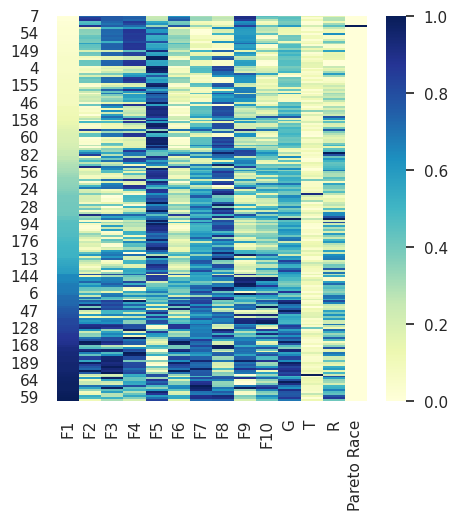

In [ ]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()

data1 = X
data1['Pareto Race'] = y
data = data1[['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','G','T','R', 'Pareto Race']]
normalized_data=(data-data.min())/(data.max()-data.min())
data_new = normalized_data.sort_values('F1')

fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(data_new, cmap="YlGnBu",ax=ax)

### **PCP**

In [ ]:
import plotly.express as px
fig = px.parallel_coordinates(data[['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','G','T','R', 'Pareto Race']],
                              color= "Pareto Race", labels={"F1", "F2", "F3", "F4", "F5", "F6", "F7", "F8", "F9", "F10", "G", "T", "Pareto Race"},
                              color_continuous_scale=px.colors.diverging.Tealrose,
                            color_continuous_midpoint=0.5)
fig.update_layout(
    font_color="black",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="green",
    font=dict(
        family="Times New Roman",
        size=22,
        color="black")
)
fig.show()

### ***t*-SNE**

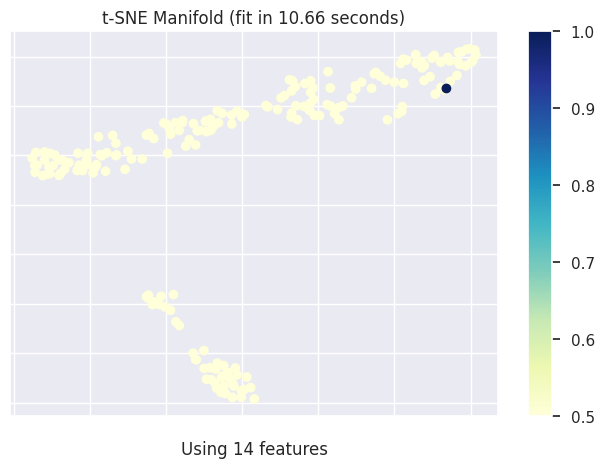

<Axes: title={'center': 't-SNE Manifold (fit in 10.66 seconds)'}, xlabel='Using 14 features'>

In [ ]:
from yellowbrick.features import Manifold
fig, axes = plt.subplots(figsize=(7,5))

X = data[['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','G','T','R', 'Pareto Race']]
y = data['Pareto Race'].values.tolist()

# Instantiate the visualizer
viz = Manifold(manifold="tsne", n_neighbors=10, colormap="YlGnBu", alpha = 1, ax = axes)
viz.fit_transform(X, y)              # Fit the data to the visualizer
viz.show()                           # Finalize and render the figure

## **iSOM Plot**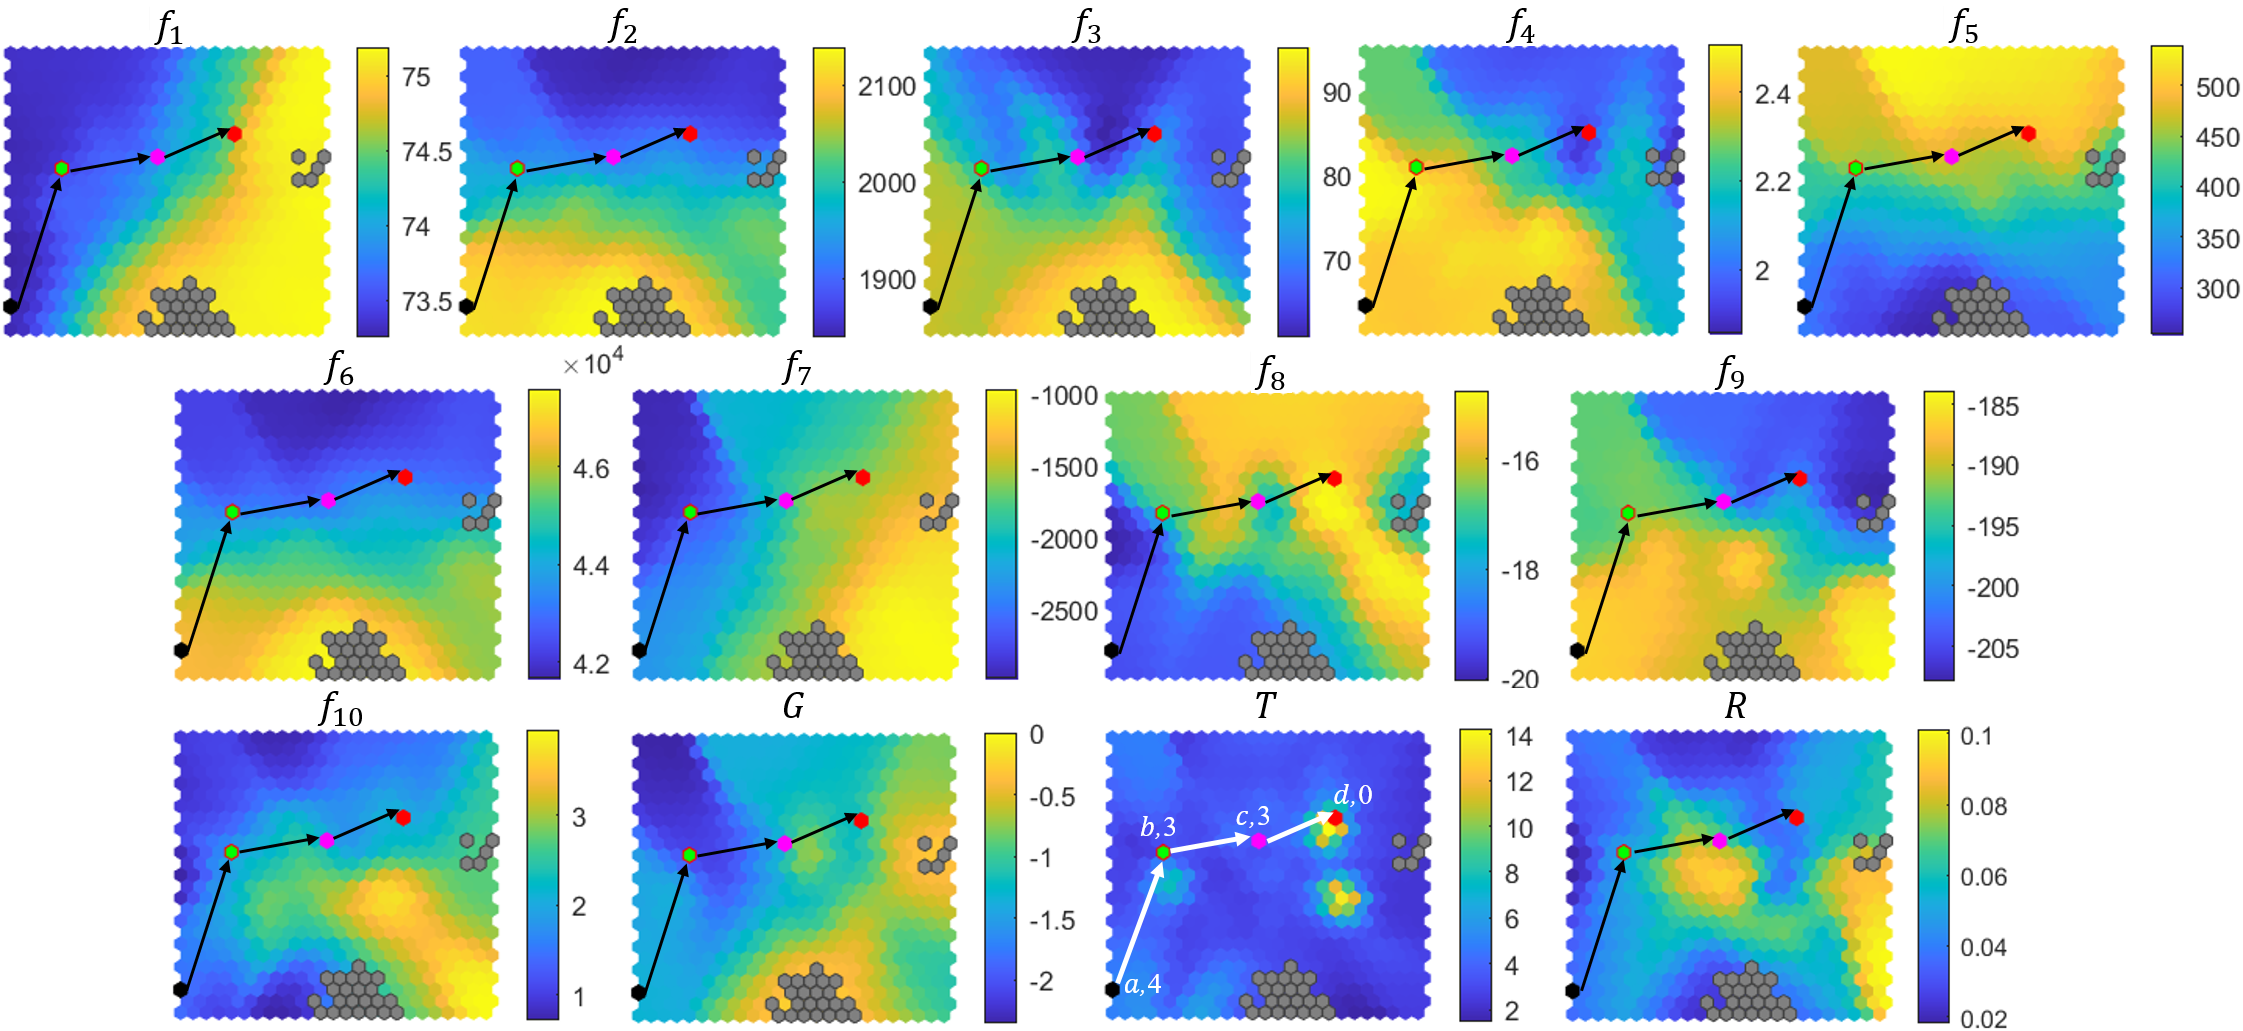